In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
# Choose the graph you want to plot (1-3)
# 1: com-youtube
# 2: roadNet-PA
# 3: soc-LiveJournal1

graph = 3


# com-youtube
if graph == 1:
    cave = 'data/pagerank/CAVE/com-youtube.ungraph_pagerank_cache'
    grid = 'data/pagerank/CAVE/com-youtube_pagerank_cache(grid)'
    gc = [46.18443333, 23.617, 15.58286667, 12.07976667, 2.097316667, 1.965746667, 2.05654, 2.797273333]
    mosaic = 'data/pagerank/CAVE/com-youtube_pagerank_cache (mosaic)'
    output_path = 'plot/pagerank/pagerank_com-youtube'
# roadNet-PA
elif graph == 2:
    cave = 'data/pagerank/CAVE/roadNet-PA_pagerank_cache'
    grid = 'data/pagerank/CAVE/roadNet-PA_pagerank_cache(grid)'
    gc = [64.49256667, 31.55013333, 21.47576667, 16.8264, 2.03073, 1.87409, 2.870256667, 2.0703]
    mosaic = 'data/pagerank/CAVE/roadnet-pa_pagerank_cache (mosaic)'
    output_path = 'plot/pagerank/pagerank_roadNet-PA'
# soc-LiveJournal1
elif graph == 3:
    cave = 'data/pagerank/CAVE/soc-LiveJournal1_pagerank_cache'
    grid = 'data/pagerank/CAVE/soc-LiveJournal1_pagerank_cache(grid)'
    gc = [27.50946667, 33.10356667, 25.56736667, 22.91066667, 21.61023333, 24.66786667, 24.98026667, 23.92506667]
    mosaic = 'data/pagerank/CAVE/soc-livejournal_pagerank_cache (mosaic)'
    output_path = 'plot/pagerank/pagerank_soc-LiveJournal1'




In [19]:
# Load CAVE and CAVE blocked
df = pd.read_csv(cave + '.csv')


# Cleaning data
df['time'] = df['time'].apply(lambda x: x*(10**-6))
df = df.drop(['res'], axis=1)
df = df.drop(['thread'], axis=1)
df = df.groupby(['algo_name', 'cache_mb']).mean().reset_index()
# df = df.drop(['key'], axis=1).groupby(['name', 'type', 'thread']).sum().reset_index()
# index = df[ (df['thread'] > 64) ].index
# df.drop(index , inplace=True)

# Creating subset
bfs = df.loc[df['algo_name'] == 'pagerank']
bfs_blocked = df.loc[df['algo_name'] == 'pagerank_blocked']


# df to array
bfs_arr = bfs['time'].to_numpy()
bfs_blocked_arr = bfs_blocked['time'].to_numpy()

if graph == 4 or graph == 5 or graph == 6:
    cache = [0.13, 0.25, 0.5, 1, 2, 4, 8, 16]
    x = list(range(len(cache)))
elif graph == 1:
    cache = pd.unique(df['cache_mb'])[1:]
    x = cache
else:
    cache = pd.unique(df['cache_mb'])
    x = cache

# Line 1, 2
y1 = bfs_arr
y1_name = "CAVE-PR"

y2 = bfs_blocked_arr
y2_name = "CAVE-PR_blocked"

df

,algo_name,cache_mb,time
0,pagerank,20,8.797604
1,pagerank,40,8.001474
2,pagerank,60,7.666972
3,pagerank,80,7.372609
4,pagerank,100,7.365197
5,pagerank,200,6.285073
6,pagerank,500,1.310979
7,pagerank,1000,1.510804
8,pagerank_blocked,20,3.337416
9,pagerank_blocked,40,3.194143


In [20]:
# Load GridGraph

df2 = pd.read_csv(grid + '.csv')


# Cleaning data
df2['time'] = df2['time'].apply(lambda x: x*(10**-6))
df2 = df2.drop(['res'], axis=1)
df2 = df2.drop(['thread'], axis=1)
df2 = df2.groupby(['algo_name', 'cache_mb']).mean().reset_index()
index = df2[ (df2['cache_mb'] > 32000) ].index
df2.drop(index , inplace=True)

# Creating subset
bfs_grid = df2.loc[df2['algo_name'] == 'pagerank']

# df to array
bfs_grid_arr = bfs_grid['time'].to_numpy()

y3 = bfs_grid_arr
y3_name = "GridGraph-PR"

df2

,algo_name,cache_mb,time
0,pagerank,20,5.539708
1,pagerank,40,5.210928
2,pagerank,60,5.158338
3,pagerank,80,5.191499
4,pagerank,100,5.002460
5,pagerank,200,5.173955
6,pagerank,500,4.984055
7,pagerank,1000,3.139817


In [21]:
# Load GraphChi

y4_name = "GraphChi-PR"
y4 = gc

In [22]:
df3 = pd.read_csv(mosaic + '.csv')


# Cleaning data
df3['time'] = df3['time'].apply(lambda x: x*(10**-6))
df3 = df3.drop(['thread'], axis=1)
df3 = df3.drop(['init_time'], axis=1)
df3 = df3.drop(['res'], axis=1)
df3 = df3.drop(['system'], axis=1)

df3 = df3.groupby(['algo_name', 'cache_mb']).mean().reset_index()
index = df3[ (df3['cache_mb'] > 32000) ].index
df3.drop(index , inplace=True)

# Creating subset
bfs_mos = df3.loc[df3['algo_name'] == 'pagerank']

# df to array
bfs_mos_arr = bfs_mos['time'].to_numpy()

y5 = bfs_mos_arr
y5_name = "Mosaic-PR"
if graph == 1:
    y5 = [None] + list(y5)

df3

,algo_name,cache_mb,time
0,pagerank,20,3.004787
1,pagerank,40,3.106454
2,pagerank,60,3.176271
3,pagerank,80,3.291864
4,pagerank,100,3.358154
5,pagerank,200,3.357559
6,pagerank,500,3.456335
7,pagerank,1000,3.513311


In [23]:
if graph == 1:
    y1 = y1[1:]
    y2 = y2[1:]
    y3 = y3[1:]
    y4 = y4[1:]
    y5 = y5[1:]

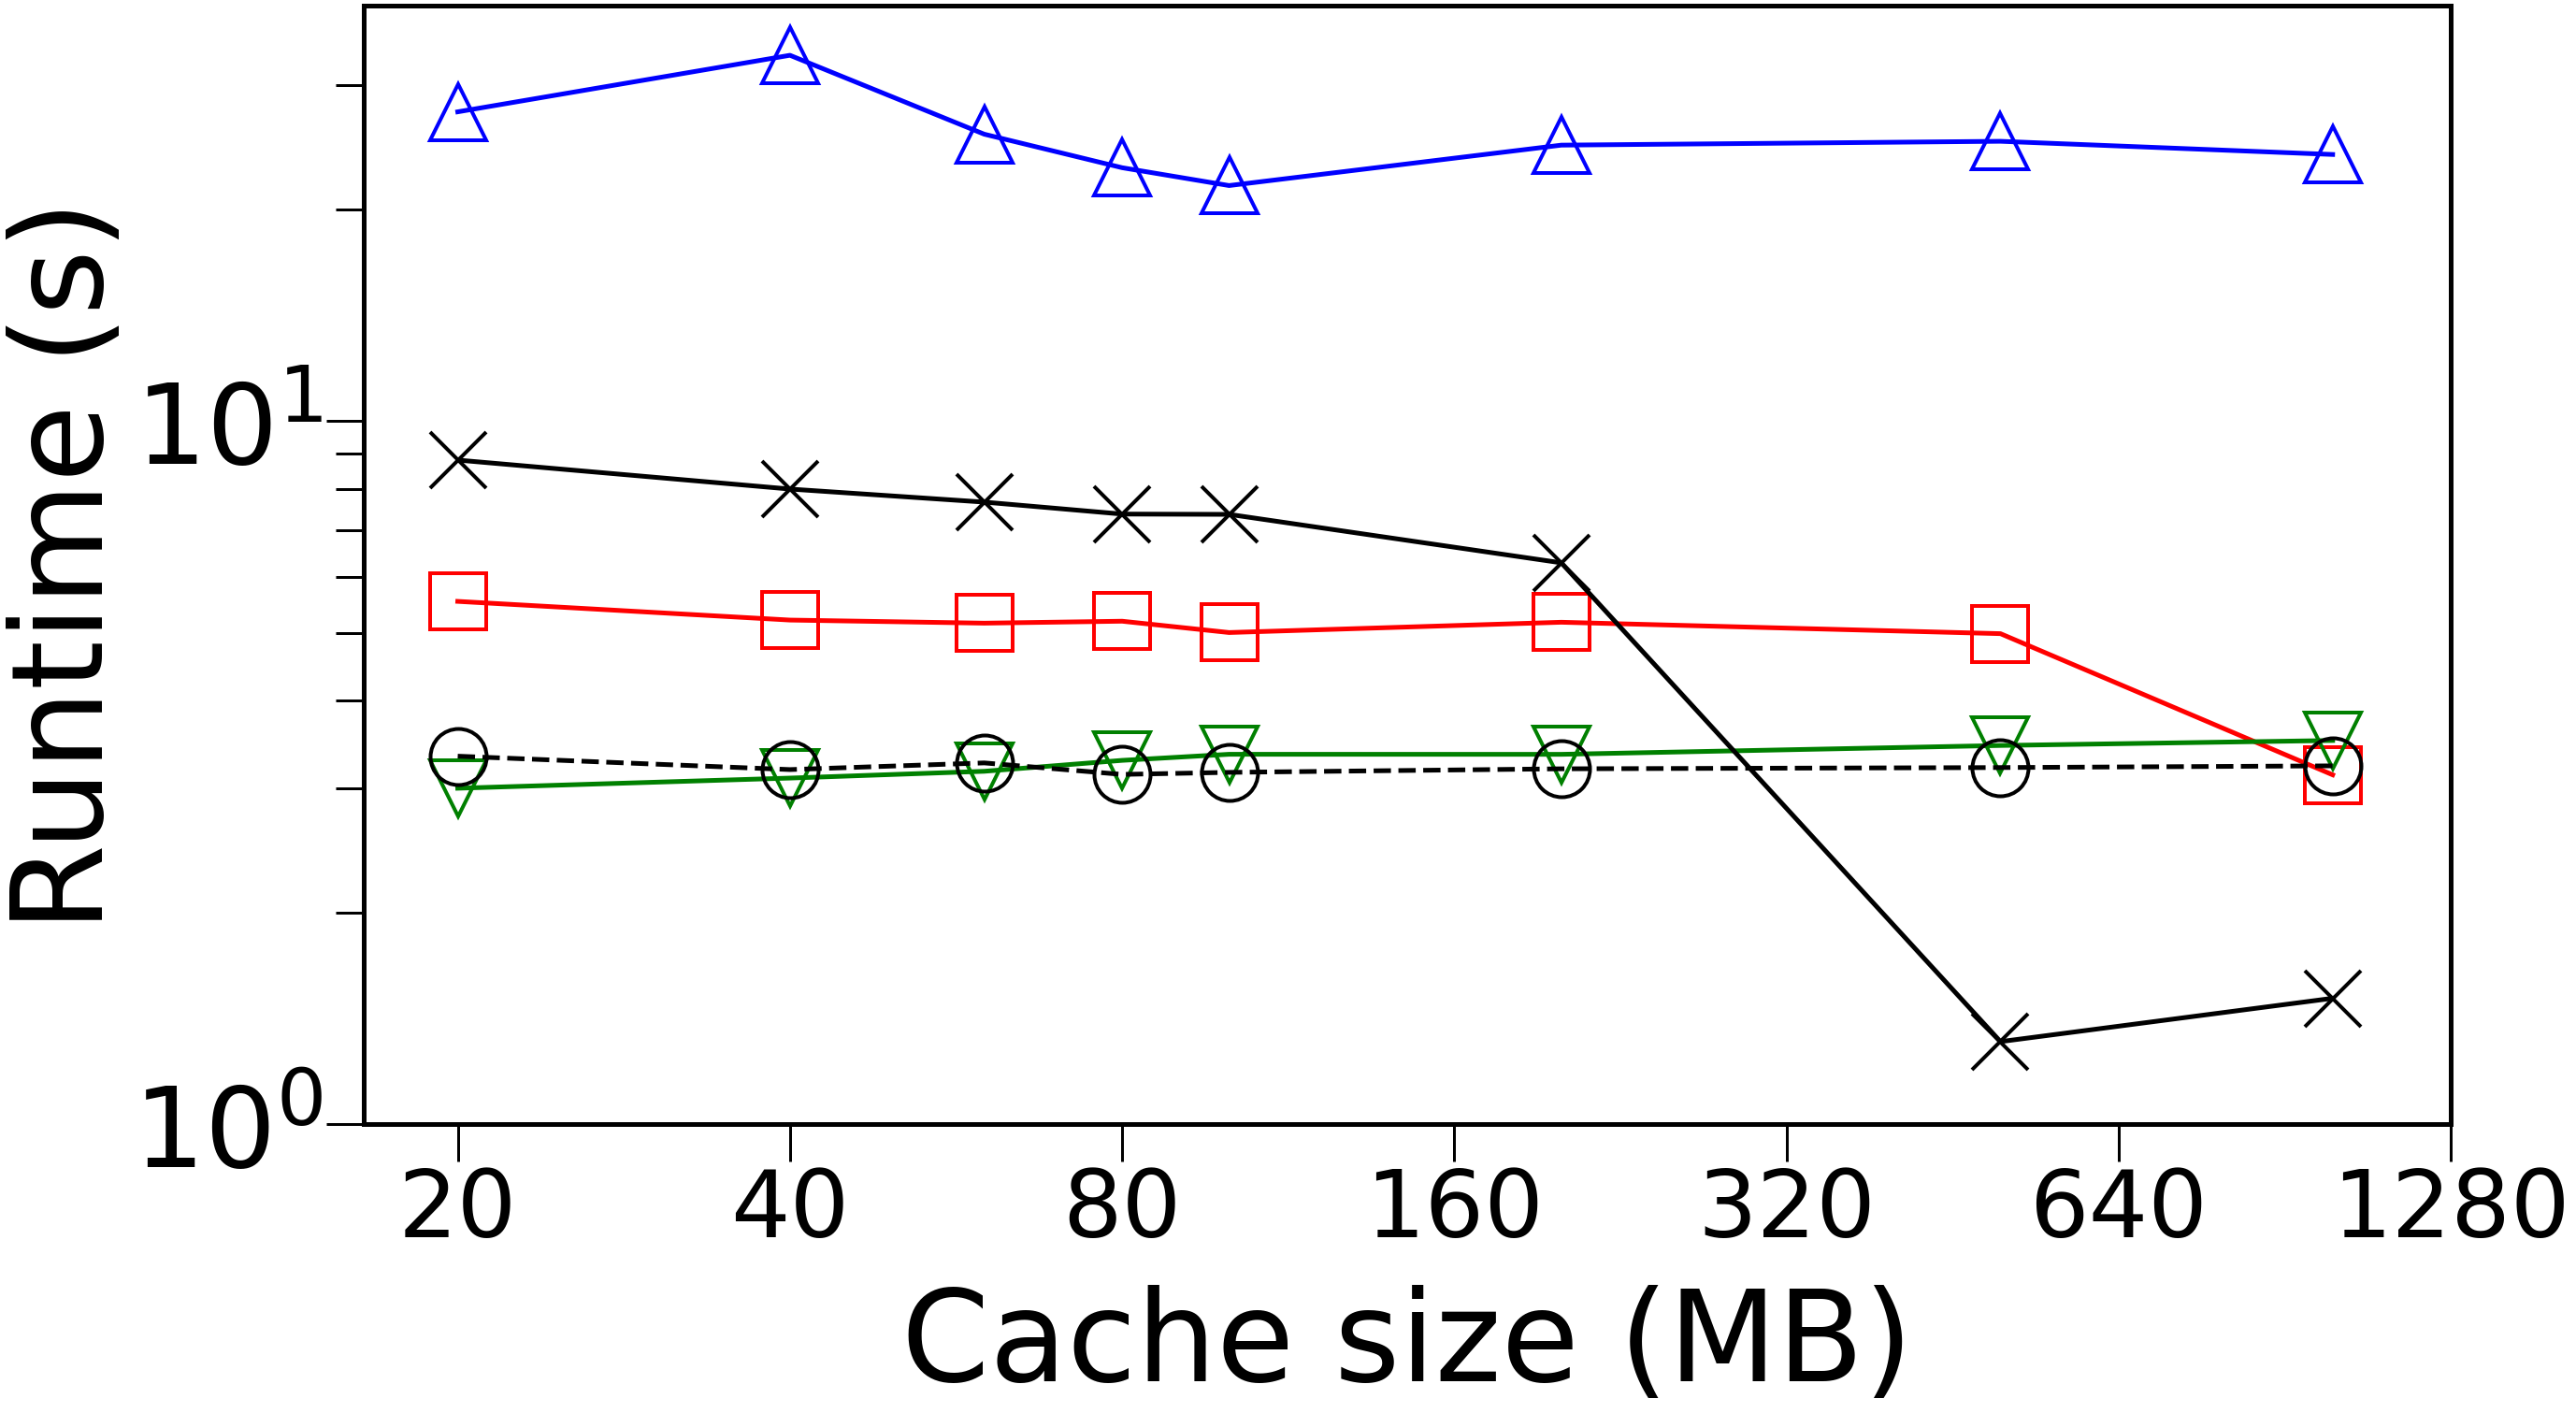

In [24]:
# Graph Settings
fig = plt.figure(figsize=(40,22))
# fig = plt.figure(figsize=(130,30))
# plt.title(title,fontsize=52)

# ax = fig.add_axes((0, 0, 1, 1))

# for axis in ['top', 'bottom', 'left', 'right']:
#     ax.spines[axis].set_linewidth(5)  # change width
    
y_label = "Runtime (s)"
x_label = "Cache size (MB)"
    
plt.xlabel(x_label,fontsize=135, labelpad=30)
plt.ylabel(y_label,fontsize=135)

plt.rc('xtick', labelsize = 100)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 120)    # fontsize of the tick labels
plt.rc('legend', fontsize = 120)    # legend fontsize
plt.rc('lines', linewidth = 5)     # line width
plt.rc('lines', markersize = 60)   # marker size
plt.rc('lines', markeredgewidth = 4)   # marker edge width
plt.rc('lines', markerfacecolor = 'none') 

plt.rcParams["axes.linewidth"] = 5    #Border width


plt.xticks(x,cache)
# plt.xticks(x,num_fsize)
plt.yscale('log')
plt.tick_params(direction='out', length=40, width=3)    # Change tick size
plt.tick_params(direction='out', which='minor',length=30, width=3)
if graph == 1:
    plt.xscale('log', base=2)
    plt.xticks([2,4,8,16,32,64], [2,4,8,16,32,64])
elif graph == 2:
    plt.xscale('log', base=2)
    plt.xticks([1,2,4,8,16,32,64], [1,2,4,8,16,32,64])
elif graph == 3:
    plt.xscale('log', base=2)
    plt.xticks([20,40,80,160,320,640,1280], [20,40,80,160,320,640,1280])

# Plot lines
plt.plot(x, y4, marker='^', color='blue', label=y4_name)
plt.plot(x, y3, marker='s', color='red', label=y3_name)
plt.plot(x, y5, marker='v', color='green', label=y5_name)
plt.plot(x, y1, marker='x', color='black', label=y1_name)
plt.plot(x, y2, marker='o', color='black', linestyle = '--', label=y2_name)

# plt.plot(x, [0,0,0,0,0,0,0,0], marker='^', color='blue', label=y4_name)
# plt.plot(x, [0,0,0,0,0,0,0,0], marker='s', color='red', label=y3_name)
# plt.plot(x, [0,0,0,0,0,0,0,0], marker='v', color='y', label=y5_name)
# plt.plot(x, [0,0,0,0,0,0,0,0], marker='x', color='green', label=y1_name)
# plt.plot(x, [0,0,0,0,0,0,0,0], marker='o', color='black', label=y2_name)

if graph == 1 or graph == 2:
    plt.xlim(right=64)
else:
    plt.xlim(right=1280)
    plt.ylim(bottom=1)

# plt.legend(ncol = 5)

# locs, labels = plt.yticks()
# l = list(locs)
# l = [0] + l
# y_ = list(range(len(l)))
# plt.yticks(y_, l) 


# plt.ylim(bottom=0)
# plt.show()

plt.savefig(output_path +'.pdf', bbox_inches = "tight")

# If output front is small, rerun this cell